# Data Cleaning

In [1]:
!pip install sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
pd.__version__

'2.2.3'

## test.csv

In [350]:
test= pd.read_csv('Data/test.csv')

In [352]:
test.head(10)

,id,date,store_nbr,item_nbr,onpromotion
0,125497040,2017-08-16,1,96995,False
1,125497041,2017-08-16,1,99197,False
2,125497042,2017-08-16,1,103501,False
3,125497043,2017-08-16,1,103520,False
4,125497044,2017-08-16,1,103665,False
5,125497045,2017-08-16,1,105574,False
6,125497046,2017-08-16,1,105575,False
7,125497047,2017-08-16,1,105576,False
8,125497048,2017-08-16,1,105577,False
9,125497049,2017-08-16,1,105693,False


In [354]:
test.shape

(3370464, 5)

In [356]:
test.dtypes

id              int64
date           object
store_nbr       int64
item_nbr        int64
onpromotion      bool
dtype: object

In [358]:
test['onpromotion'] = test['onpromotion'].astype(int)
test['onpromotion'] 

0          0
1          0
2          0
3          0
4          0
          ..
3370459    0
3370460    0
3370461    0
3370462    0
3370463    0
Name: onpromotion, Length: 3370464, dtype: int32

In [360]:
test['date']=pd.to_datetime(test['date'] , format= '%Y-%m-%d')
test['date']

0         2017-08-16
1         2017-08-16
2         2017-08-16
3         2017-08-16
4         2017-08-16
             ...    
3370459   2017-08-31
3370460   2017-08-31
3370461   2017-08-31
3370462   2017-08-31
3370463   2017-08-31
Name: date, Length: 3370464, dtype: datetime64[ns]

In [362]:
print(test.isnull().sum())

id             0
date           0
store_nbr      0
item_nbr       0
onpromotion    0
dtype: int64


In [364]:
duplicates = test.duplicated().sum()
duplicates

0

In [365]:
test.drop(columns=['id'], inplace=True)

In [368]:
# time based features
test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['is_weekend'] = test['date'].dt.dayofweek >= 5
test['is_weekend'] = test['is_weekend'].astype(int)
test['day'] = test['date'].dt.day
test['dayofweek'] = test['date'].dt.dayofweek
test['weekofyear'] = test['date'].dt.isocalendar().week
test['quarter'] = test['date'].dt.quarter

In [321]:
test.head()

,date,store_nbr,item_nbr,onpromotion,year,month,is_weekend,day,dayofweek,weekofyear,quarter
0,2017-08-16,1,96995,0,2017,8,0,16,2,33,3
1,2017-08-16,1,99197,0,2017,8,0,16,2,33,3
2,2017-08-16,1,103501,0,2017,8,0,16,2,33,3
3,2017-08-16,1,103520,0,2017,8,0,16,2,33,3
4,2017-08-16,1,103665,0,2017,8,0,16,2,33,3


## train.csv

In [370]:
train = pd.read_parquet('Data/train_reduced.parquet')
train = train[train['date'] >= '2016-01-01']
train.reset_index(drop=True, inplace=True)
train.head(10)

,date,store_nbr,item_nbr,unit_sales,onpromotion
0,2016-01-01,25,105574,12.0,0
1,2016-01-01,25,105575,9.0,0
2,2016-01-01,25,105857,3.0,0
3,2016-01-01,25,108634,3.0,0
4,2016-01-01,25,108701,2.0,1
5,2016-01-01,25,108786,2.0,0
6,2016-01-01,25,108797,1.0,0
7,2016-01-01,25,108952,12.0,0
8,2016-01-01,25,111397,5.0,0
9,2016-01-01,25,114790,4.0,0


In [26]:
train.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59034253 entries, 0 to 59034252
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int16         
 2   item_nbr     int32         
 3   unit_sales   float32       
 4   onpromotion  int8          
dtypes: datetime64[ns](1), float32(1), int16(1), int32(1), int8(1)
memory usage: 1.0 GB


In [27]:
train.shape

(59034253, 5)

In [28]:
print(train.isnull().sum())

date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
dtype: int64


In [29]:
#train['onpromotion'].value_counts()

In [30]:
#train["onpromotion"] = train["onpromotion"].astype(str)
#train["onpromotion"] = train["onpromotion"].replace("nan", "False") 
#train["onpromotion"] = train["onpromotion"].map({"False": 0, "True": 1}).astype("int8")
#train['onpromotion']

In [31]:
#train['date']=pd.to_datetime(train['date'] , format= '%Y-%m-%d')
#train['date']

In [32]:
train.dtypes

date           datetime64[ns]
store_nbr               int16
item_nbr                int32
unit_sales            float32
onpromotion              int8
dtype: object

In [24]:
train_duplicates = train.duplicated().sum()
train_duplicates

0

In [25]:
print(train["unit_sales"].describe())

count    5.903425e+07
mean     8.180618e+00
std      2.636123e+01
min      1.000000e-03
25%      2.000000e+00
50%      4.000000e+00
75%      8.000000e+00
max      8.944000e+04
Name: unit_sales, dtype: float64


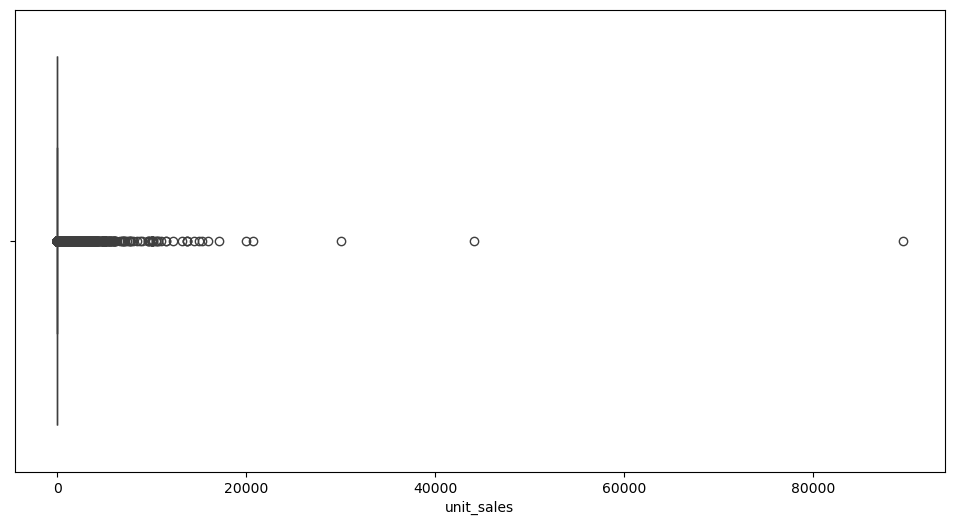

In [26]:
# to see outliers clearly
#plt.figure(figsize=(12,6))
#sns.boxplot(x=train["unit_sales"])
#plt.show()

In [58]:
#Z-Score
# مش مناسب لتوزيع البيانات
#upper_limit = train['unit_sales'].mean() + 3*train['unit_sales'].std()
#lower_limit = train['unit_sales'].mean() - 3*train['unit_sales'].std()
#upper_limit, lower_limit

(87.26431083679199, -70.90307426452637)

In [74]:
#outliers = ((train['unit_sales'] > upper_limit) | (train['unit_sales'] < lower_limit))
#outliers.sum()

377725

In [80]:
#IQR
# بيحذف بيانات كتيره
#q1 = train['unit_sales'].quantile(0.25)
#q3 = train['unit_sales'].quantile(0.75)
#iqr = q3 - q1
#q1, q3, iqr

(2.0, 8.0, 6.0)

In [82]:
#upper_limit = q3 + (1.5*iqr)
#lower_limit = q1 - (1.5*iqr)
#upper_limit, lower_limit

(17.0, -7.0)

In [84]:
#outliers = ((train['unit_sales'] > upper_limit) | (train['unit_sales'] < lower_limit))
#outliers.sum()

5832099

In [372]:
#percentile
upper_limit = train['unit_sales'].quantile(0.99)
lower_limit = train['unit_sales'].quantile(0.01)
upper_limit, lower_limit

(69.0, 1.0)

In [373]:
outliers = ((train['unit_sales'] > upper_limit) | (train['unit_sales'] < lower_limit))
outliers.sum()

852948

In [374]:
#Capping
train.loc[(train['unit_sales']>upper_limit), 'unit_sales'] = upper_limit
train.loc[(train['unit_sales']<lower_limit), 'unit_sales'] = lower_limit

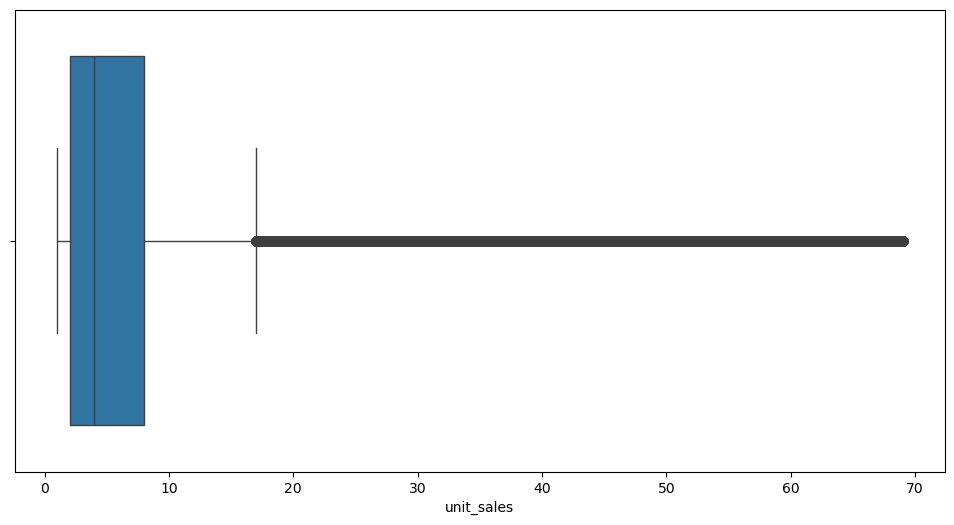

In [98]:
#plt.figure(figsize=(12,6))
#sns.boxplot(x=train["unit_sales"])
#plt.show()

In [104]:
print(train["unit_sales"].describe())

count    5.903425e+07
mean     7.512209e+00
std      1.041098e+01
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      8.000000e+00
max      6.900000e+01
Name: unit_sales, dtype: float64


In [378]:
#Logarithmic Transformation
train["unit_sales"] = np.log1p(train["unit_sales"])

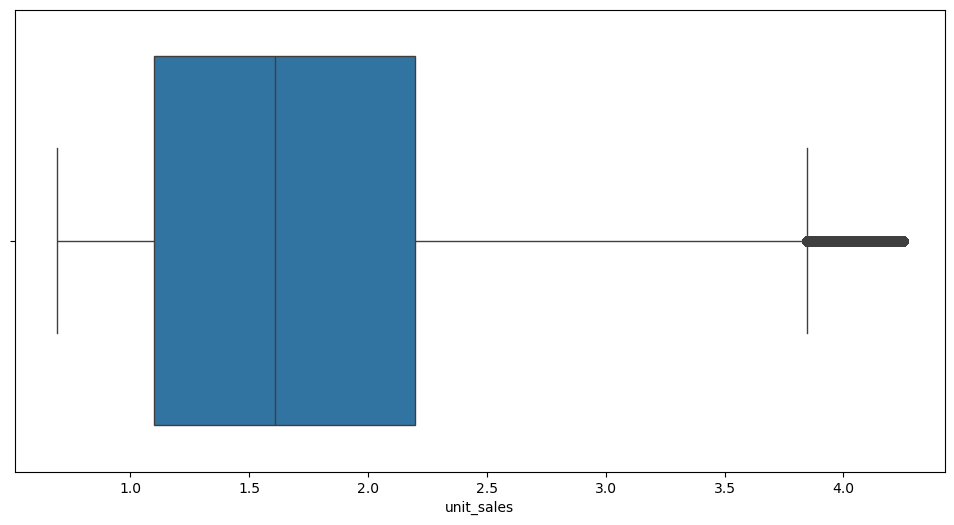

In [110]:
#plt.figure(figsize=(12,6))
#sns.boxplot(x=train["unit_sales"])
#plt.show()

In [111]:
print(train["unit_sales"].describe())

count    5.903425e+07
mean     1.703571e+00
std      9.279683e-01
min      6.931472e-01
25%      1.098612e+00
50%      1.609438e+00
75%      2.197225e+00
max      4.248495e+00
Name: unit_sales, dtype: float64


In [114]:
#train = train.loc[train["unit_sales"] >= 0]

In [380]:
# time based features
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['is_weekend'] = train['date'].dt.dayofweek >= 5
train['is_weekend'] = train['is_weekend'].astype(int)
train['day'] = train['date'].dt.day
train['dayofweek'] = train['date'].dt.dayofweek
train['weekofyear'] = train['date'].dt.isocalendar().week
train['quarter'] = train['date'].dt.quarter

In [382]:
train['lag_7'] = train['unit_sales'].shift(7).fillna(0)

In [384]:
train['rolling_mean_7'] = train.groupby(['store_nbr', 'item_nbr'])['unit_sales'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

In [386]:
train['rolling_mean_30'] = train.groupby(['store_nbr', 'item_nbr'])['unit_sales'].transform(lambda x: x.rolling(window=30, min_periods=1).mean())

In [124]:
#train.drop(columns=['id'], inplace=True)

In [332]:
train.sample(10)

,date,store_nbr,item_nbr,unit_sales,onpromotion,year,month,lag_7,rolling_mean_7,rolling_mean_30,...,type,cluster,dcoilwtico,family,is_holiday,day,dayofweek,is_weekend,weekofyear,quarter
55808590,2017-07-16,11,660319,4.219508,1,2017,7,1.609438,3.601851,3.593085,...,1,6,NaN,5,0,16,6,1,28,3
31615879,2016-11-26,37,1070962,1.945910,1,2016,11,1.098612,1.796955,1.811149,...,3,2,NaN,12,0,26,5,1,47,4
13704757,2016-05-24,54,1354386,1.098612,1,2016,5,2.995732,1.410727,1.190588,...,2,3,48.04,12,1,24,1,0,21,2
13391843,2016-05-21,42,1501520,1.098612,0,2016,5,2.708050,0.982765,0.979657,...,3,2,NaN,30,0,21,5,1,20,2
16534924,2016-06-23,50,1178692,1.098612,0,2016,6,1.609438,1.309931,1.457318,...,0,14,49.34,7,1,23,3,0,25,2
33909145,2016-12-18,45,1047757,2.484907,1,2016,12,2.639057,2.413739,2.281489,...,0,11,NaN,3,0,18,6,1,50,4
11389349,2016-04-30,53,584078,2.249817,1,2016,4,2.051299,1.568736,1.466142,...,3,13,NaN,24,1,30,5,1,17,2
19961148,2016-07-29,33,1920071,1.945910,1,2016,7,1.386294,1.421754,1.245448,...,2,3,41.54,12,0,29,4,0,30,3
49051236,2017-05-13,30,2083859,1.945910,0,2017,5,1.098612,1.543935,1.437586,...,2,3,NaN,3,1,13,5,1,19,2
12968563,2016-05-17,11,1457175,1.791759,0,2016,5,0.693147,1.821862,1.947708,...,1,6,48.29,18,0,17,1,0,20,2


## transactions.csv

In [61]:
transactions=pd.read_csv('Data/transactions.csv')
transactions = transactions[transactions['date']>='2016-01-01']
transactions.reset_index(drop=True, inplace=True)
transactions.head()

,date,store_nbr,transactions
0,2016-01-02,2,6
1,2016-01-02,16,373
2,2016-01-02,20,1816
3,2016-01-02,21,1388
4,2016-01-02,22,849


In [63]:
transactions.shape

(31096, 3)

In [65]:
transactions.dtypes

date            object
store_nbr        int64
transactions     int64
dtype: object

In [67]:
transactions['date']=pd.to_datetime(transactions['date'] , format= '%Y-%m-%d')

In [69]:
transactions_dup=transactions.duplicated().sum()
transactions_dup

0

In [71]:
print(transactions.isnull().sum())

date            0
store_nbr       0
transactions    0
dtype: int64


In [73]:
transactions['transactions'].describe()

count    31096.000000
mean      1641.769777
std        939.367664
min          5.000000
25%       1011.000000
50%       1355.000000
75%       1971.000000
max       8307.000000
Name: transactions, dtype: float64

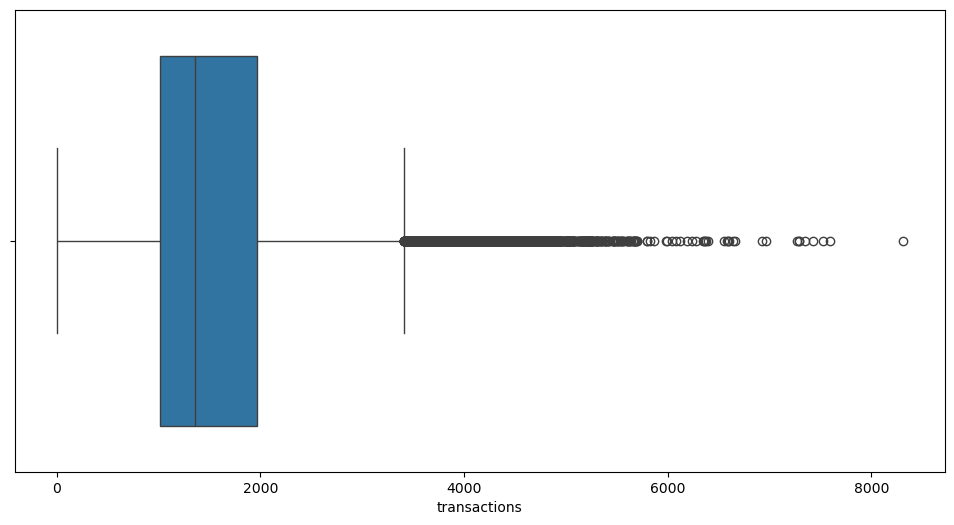

In [75]:
plt.figure(figsize=(12,6))
sns.boxplot(x=transactions["transactions"])
plt.show()

In [77]:
upper_limit = transactions['transactions'].quantile(0.99)
lower_limit = transactions['transactions'].quantile(0.01)
upper_limit, lower_limit

(4743.049999999999, 503.95)

In [79]:
outliers = ((transactions['transactions'] > upper_limit) | (transactions['transactions'] < lower_limit))
outliers.sum()

622

In [81]:
#Capping
transactions.loc[(transactions['transactions']>upper_limit), 'transactions'] = upper_limit
transactions.loc[(transactions['transactions']<lower_limit), 'transactions'] = lower_limit

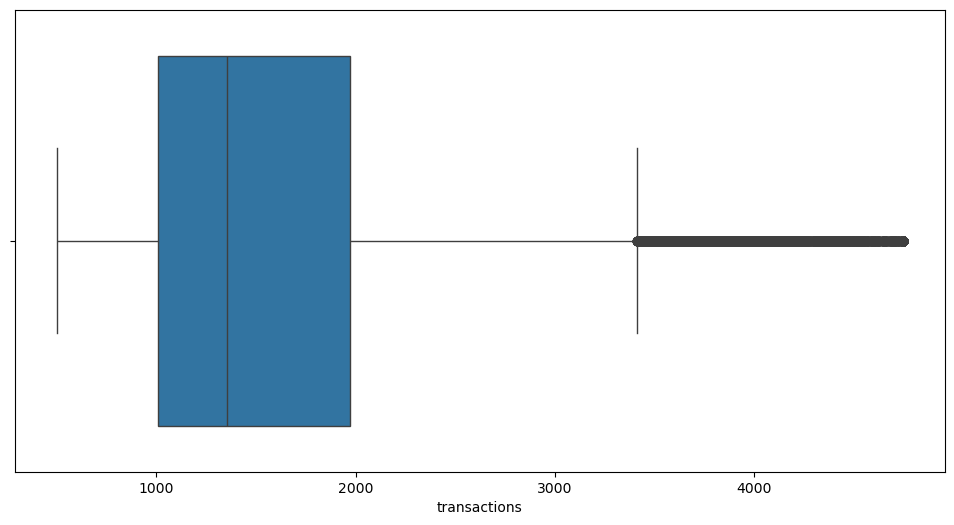

In [83]:
plt.figure(figsize=(12,6))
sns.boxplot(x=transactions["transactions"])
plt.show()

In [85]:
transactions['transactions'].describe()

count    31096.000000
mean      1637.253184
std        918.478092
min        503.950000
25%       1011.000000
50%       1355.000000
75%       1971.000000
max       4743.050000
Name: transactions, dtype: float64

In [87]:
transactions["transactions"] = np.log1p(transactions["transactions"])

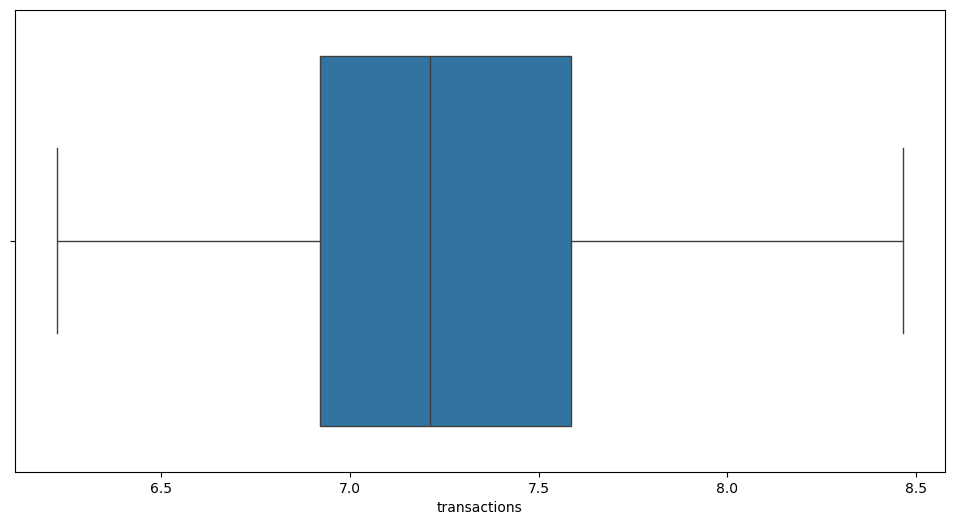

In [89]:
plt.figure(figsize=(12,6))
sns.boxplot(x=transactions["transactions"])
plt.show()

In [91]:
transactions['transactions'].describe()

count    31096.000000
mean         7.266539
std          0.509535
min          6.224459
25%          6.919684
50%          7.212294
75%          7.586804
max          8.464646
Name: transactions, dtype: float64

In [93]:
transactions['avg_transaction_per_store'] = transactions.groupby("store_nbr")["transactions"].transform("mean")
transactions.head()

,date,store_nbr,transactions,avg_transaction_per_store
0,2016-01-02,2,6.224459,7.539861
1,2016-01-02,16,6.224459,6.609168
2,2016-01-02,20,7.504942,7.309688
3,2016-01-02,21,7.236339,6.940041
4,2016-01-02,22,6.745236,6.597638


In [95]:
transactions['transactions']=transactions['transactions'].astype('int32')
transactions['store_nbr']=transactions['store_nbr'].astype('int32')

In [192]:
train = train.merge(transactions[['date','store_nbr','transactions']], on=['date','store_nbr'], how='left')

In [334]:
test = test.merge(transactions[['date','store_nbr','transactions']], on=['date','store_nbr'], how='left')

## stores.csv

In [99]:
stores=pd.read_csv('Data/stores.csv')
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [101]:
stores.shape

(54, 5)

In [103]:
print(stores.isnull().sum())

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64


In [105]:
stores_duplicates=stores.duplicated().sum()
stores_duplicates

0

In [107]:
stores['city'].value_counts()

city
Quito            18
Guayaquil         8
Cuenca            3
Santo Domingo     3
Manta             2
Latacunga         2
Machala           2
Ambato            2
Quevedo           1
Esmeraldas        1
Loja              1
Libertad          1
Playas            1
Daule             1
Babahoyo          1
Salinas           1
Puyo              1
Guaranda          1
Ibarra            1
Riobamba          1
Cayambe           1
El Carmen         1
Name: count, dtype: int64

In [109]:
stores['city'] = LabelEncoder().fit_transform(stores['city'])
stores['state'] = LabelEncoder().fit_transform(stores['state'])
stores['type'] = LabelEncoder().fit_transform(stores['type'])
stores.head()

,store_nbr,city,state,type,cluster
0,1,18,12,3,13
1,2,18,12,3,13
2,3,18,12,3,8
3,4,18,12,3,9
4,5,21,14,3,4


In [111]:
stores.dtypes

store_nbr    int64
city         int32
state        int32
type         int32
cluster      int64
dtype: object

In [113]:
stores['store_nbr']=stores['store_nbr'].astype('int32')
train = train.merge(stores[['store_nbr','type', 'cluster']], on='store_nbr', how='left')

In [336]:
test = test.merge(stores[['store_nbr','type', 'cluster']], on='store_nbr', how='left')

## oil.csv

In [118]:
oil = pd.read_csv('Data/oil.csv')
oil = oil[oil['date']>='2016-01-01']
oil.reset_index(drop=True, inplace=True)
oil.head()

,date,dcoilwtico
0,2016-01-01,NaN
1,2016-01-04,36.81
2,2016-01-05,35.97
3,2016-01-06,33.97
4,2016-01-07,33.29


In [120]:
oil.shape

(435, 2)

In [122]:
print(oil.isnull().sum())

date           0
dcoilwtico    16
dtype: int64


In [124]:
oil['dcoilwtico'] = oil['dcoilwtico'].bfill()

In [126]:
oil.head()

,date,dcoilwtico
0,2016-01-01,36.81
1,2016-01-04,36.81
2,2016-01-05,35.97
3,2016-01-06,33.97
4,2016-01-07,33.29


In [128]:
oil.dtypes

date           object
dcoilwtico    float64
dtype: object

In [130]:
oil['date']=pd.to_datetime(oil['date'] , format= '%Y-%m-%d')

In [132]:
#Moving Average
oil['oil_ma7'] = oil['dcoilwtico'].rolling(window=7).mean().fillna(0)

In [134]:
oil['oil_price_change']=oil['dcoilwtico'].pct_change().fillna(0)

In [136]:
oil.head()

,date,dcoilwtico,oil_ma7,oil_price_change
0,2016-01-01,36.81,0.0,0.000000
1,2016-01-04,36.81,0.0,0.000000
2,2016-01-05,35.97,0.0,-0.022820
3,2016-01-06,33.97,0.0,-0.055602
4,2016-01-07,33.29,0.0,-0.020018


In [138]:
print(oil.isnull().sum())

date                0
dcoilwtico          0
oil_ma7             0
oil_price_change    0
dtype: int64


In [237]:
train = train.merge(oil[['date', 'dcoilwtico']], on='date', how='left')

In [338]:
test = test.merge(oil[['date', 'dcoilwtico']], on='date', how='left')

## items.csv

In [143]:
items=pd.read_csv('Data/items.csv')
items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [145]:
items.shape

(4100, 4)

In [147]:
print(items.isnull().sum())

item_nbr      0
family        0
class         0
perishable    0
dtype: int64


In [149]:
items_duplicates=items.duplicated().sum()
items_duplicates

0

In [151]:
items['family'] = LabelEncoder().fit_transform(items['family'])

In [153]:
items['class_perishable_interaction'] = items['class'] * items['perishable']

In [155]:
items.head()

,item_nbr,family,class,perishable,class_perishable_interaction
0,96995,12,1093,0,0
1,99197,12,1067,0,0
2,103501,7,3008,0,0
3,103520,12,1028,0,0
4,103665,5,2712,1,2712


In [157]:
items['family']=items['family'].astype('category')
items['perishable']=items['perishable'].astype('int16')
items['item_nbr']=items['item_nbr'].astype('int32')

In [258]:
train = train.merge(items[['item_nbr', 'family']], on='item_nbr', how='left')

In [340]:
test = test.merge(items[['item_nbr', 'family']], on='item_nbr', how='left')

## holidays_events.csv

In [162]:
holidays_events=pd.read_csv('Data/holidays_events.csv')
holidays_events=holidays_events[holidays_events['date']>='2016-01-01']
holidays_events.reset_index(drop=True, inplace=True)

In [164]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2016-01-01,Holiday,National,Ecuador,Primer dia del ano,False
1,2016-02-08,Holiday,National,Ecuador,Carnaval,False
2,2016-02-09,Holiday,National,Ecuador,Carnaval,False
3,2016-03-02,Holiday,Local,Manta,Fundacion de Manta,False
4,2016-03-25,Holiday,National,Ecuador,Viernes Santo,False


In [166]:
holidays_events.shape

(139, 6)

In [168]:
holidays_events['type'].value_counts()

type
Holiday       75
Event         35
Additional    18
Transfer       9
Bridge         1
Work Day       1
Name: count, dtype: int64

In [170]:
holidays_events['locale_name'].value_counts()

locale_name
Ecuador                           77
Guayaquil                          5
Quito                              5
Riobamba                           4
Guaranda                           4
Latacunga                          4
Ambato                             4
Cuenca                             3
Ibarra                             3
Loja                               2
Santa Elena                        2
Santo Domingo de los Tsachilas     2
Quevedo                            2
Esmeraldas                         2
Santo Domingo                      2
Cayambe                            2
Manta                              2
El Carmen                          2
Imbabura                           2
Machala                            2
Puyo                               2
Libertad                           2
Cotopaxi                           2
Salinas                            2
Name: count, dtype: int64

In [172]:
holidays_events['type'] = LabelEncoder().fit_transform(holidays_events['type'])
holidays_events['locale'] = LabelEncoder().fit_transform(holidays_events['locale'])
holidays_events['locale_name'] = LabelEncoder().fit_transform(holidays_events['locale_name'])

In [174]:
holidays_events['transferred']=holidays_events['transferred'].astype(int)

In [176]:
holidays_events['description'].value_counts()

description
Carnaval                       4
Fundacion de Ibarra            3
Fundacion de Cuenca            3
Fundacion de Guayaquil         2
Cantonizacion de Quevedo       2
                              ..
Terremoto Manabi+15            1
Terremoto Manabi+14            1
Terremoto Manabi+13            1
Terremoto Manabi+12            1
Traslado Fundacion de Quito    1
Name: count, Length: 87, dtype: int64

In [178]:
holidays_events.drop(columns=['description'], inplace=True)

In [180]:
holidays_events.head()

,date,type,locale,locale_name,transferred
0,2016-01-01,3,1,4,0
1,2016-02-08,3,1,4,0
2,2016-02-09,3,1,4,0
3,2016-03-02,3,0,15,0
4,2016-03-25,3,1,4,0


In [182]:
print(holidays_events.isnull().sum())

date           0
type           0
locale         0
locale_name    0
transferred    0
dtype: int64


In [184]:
holidays_events_dup=holidays_events.duplicated().sum()
holidays_events_dup

1

In [186]:
holidays_events.drop_duplicates(inplace=True)

In [188]:
holidays_events['date']=pd.to_datetime(holidays_events['date'] , format= '%Y-%m-%d')

In [190]:
holidays_events.dtypes

date           datetime64[ns]
type                    int32
locale                  int32
locale_name             int32
transferred             int32
dtype: object

In [192]:
holidays_events.head()

,date,type,locale,locale_name,transferred
0,2016-01-01,3,1,4,0
1,2016-02-08,3,1,4,0
2,2016-02-09,3,1,4,0
3,2016-03-02,3,0,15,0
4,2016-03-25,3,1,4,0


In [320]:
train['is_holiday'] = train['date'].isin(holidays_events['date']).astype(int)

In [342]:
test['is_holiday'] = test['date'].isin(holidays_events['date']).astype(int)

In [338]:
train.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion,year,month,lag_7,rolling_mean_7,rolling_mean_30,...,type,cluster,dcoilwtico,family,is_holiday,day,dayofweek,is_weekend,weekofyear,quarter
0,2016-01-01,25,105574,2.564949,0,2016,1,0.0,2.564949,2.564949,...,3,1,36.81,12,1,1,4,0,53,1
1,2016-01-01,25,105575,2.302585,0,2016,1,0.0,2.302585,2.302585,...,3,1,36.81,12,1,1,4,0,53,1
2,2016-01-01,25,105857,1.386294,0,2016,1,0.0,1.386294,1.386294,...,3,1,36.81,12,1,1,4,0,53,1
3,2016-01-01,25,108634,1.386294,0,2016,1,0.0,1.386294,1.386294,...,3,1,36.81,12,1,1,4,0,53,1
4,2016-01-01,25,108701,1.098612,1,2016,1,0.0,1.098612,1.098612,...,3,1,36.81,9,1,1,4,0,53,1


In [340]:
train.isnull().sum()

date                      0
store_nbr                 0
item_nbr                  0
unit_sales                0
onpromotion               0
year                      0
month                     0
lag_7                     0
rolling_mean_7            0
rolling_mean_30           0
transactions         210319
type                      0
cluster                   0
dcoilwtico         17821600
family                    0
is_holiday                0
day                       0
dayofweek                 0
is_weekend                0
weekofyear                0
quarter                   0
dtype: int64

In [ ]:
duplicates = train.duplicated().sum()
duplicates

In [348]:
train['transactions'] = train['transactions'].fillna(0)
train['dcoilwtico'] = train['dcoilwtico'].ffill()

In [350]:
train.isnull().sum()

date               0
store_nbr          0
item_nbr           0
unit_sales         0
onpromotion        0
year               0
month              0
lag_7              0
rolling_mean_7     0
rolling_mean_30    0
transactions       0
type               0
cluster            0
dcoilwtico         0
family             0
is_holiday         0
day                0
dayofweek          0
is_weekend         0
weekofyear         0
quarter            0
dtype: int64

In [344]:
test.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion,year,month,is_weekend,day,dayofweek,...,cluster_x,lag_7,rolling_mean_7,rolling_mean_30,transactions,type_y,cluster_y,dcoilwtico,family,is_holiday
0,2017-08-16,1,96995,NaN,0,2017,8,0,16,2,...,NaN,1.098612,1.710736,1.909783,NaN,3,13,46.8,12,0
1,2017-08-16,1,99197,NaN,0,2017,8,0,16,2,...,NaN,0.693147,1.589693,1.892756,NaN,3,13,46.8,12,0
2,2017-08-16,1,103501,NaN,0,2017,8,0,16,2,...,NaN,NaN,1.671540,1.920140,NaN,3,13,46.8,7,0
3,2017-08-16,1,103520,NaN,0,2017,8,0,16,2,...,NaN,1.098612,1.671540,1.920140,NaN,3,13,46.8,12,0
4,2017-08-16,1,103665,NaN,0,2017,8,0,16,2,...,NaN,0.693147,1.078982,1.888544,NaN,3,13,46.8,5,0


In [268]:
test.isnull().sum()

date                     0
store_nbr                0
item_nbr                 0
unit_sales         3370464
onpromotion              0
year                     0
month                    0
is_weekend               0
day                      0
dayofweek                0
weekofyear               0
quarter                  0
lag_7              2232983
rolling_mean_7     3298053
rolling_mean_30    3358512
transactions       3370464
type                     0
cluster                  0
dcoilwtico          842616
family                   0
is_holiday               0
dtype: int64

In [270]:
duplicates = test.duplicated().sum()
duplicates

0

In [272]:
test['transactions'] = test['transactions'].fillna(0)
test['dcoilwtico'] = test['dcoilwtico'].ffill()

In [292]:
test.isnull().sum()

date                     0
store_nbr                0
item_nbr                 0
onpromotion              0
year                     0
month                    0
is_weekend               0
day                      0
dayofweek                0
weekofyear               0
quarter                  0
lag_7              2232983
rolling_mean_7     3298053
rolling_mean_30    3358512
transactions             0
type                     0
cluster                  0
dcoilwtico               0
family                   0
is_holiday               0
dtype: int64

In [362]:
train.shape

(59034253, 21)

In [298]:
test_cleaned.shape

(11896, 20)

In [300]:
test.shape

(3370464, 20)

In [370]:
train.columns

Index(['date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion', 'year',
       'month', 'lag_7', 'rolling_mean_7', 'rolling_mean_30', 'transactions',
       'type', 'cluster', 'dcoilwtico', 'family', 'is_holiday', 'day',
       'dayofweek', 'is_weekend', 'weekofyear', 'quarter'],
      dtype='object')

In [346]:
test.columns

Index(['date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion', 'year',
       'month', 'is_weekend', 'day', 'dayofweek', 'weekofyear', 'quarter',
       'type_x', 'cluster_x', 'lag_7', 'rolling_mean_7', 'rolling_mean_30',
       'transactions', 'type_y', 'cluster_y', 'dcoilwtico', 'family',
       'is_holiday'],
      dtype='object')

In [378]:
test.to_csv('Cleaned_Data/test.csv', index=False)

In [379]:
train.to_parquet('Cleaned_Data/train.parquet', engine="pyarrow", compression="snappy", index=False)

In [382]:
#transactions.to_csv('Cleaned_Data/transactions.csv', index=False)

In [384]:
#stores.to_csv('Cleaned_Data/stores.csv', index=False)

In [386]:
#oil.to_csv('Cleaned_Data/oil.csv', index=False)

In [388]:
#items.to_csv('Cleaned_Data/items.csv', index=False)

In [390]:
#holidays_events.to_csv('Cleaned_Data/holidayes_events.csv', index=False)